## Dist-dip tests

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

from scipy.spatial.distance import squareform
from unidip.dip import diptst as diptest

In [ ]:
dip, pval, (left_idx, right_idx) = diptest(np.msort(dm.ravel()), is_hist=False, numt=100)

In [27]:
meta = pd.read_csv('../data/contours/contours-200-metadata.csv', index_col=0)

In [2]:
representations = ['centered', 'normalized', 'smooth', 'intervals',
        'derivatives', 'smooth_derivatives']

In [62]:
metric = 'dtw'
subset = 200
repres = 'smooth_derivatives'

fn = f'../data/similarities/sim-{metric}-{subset}-{repres}.txt.gz'
similarities = np.loadtxt(fn)

In [63]:
def get_sm_subset(dataset_id):
    sm = squareform(similarities)
    match = meta['dataset_id'] == dataset_id
    return sm[match,:][:, match]    

In [64]:
idx = np.triu_indices(200, 1)

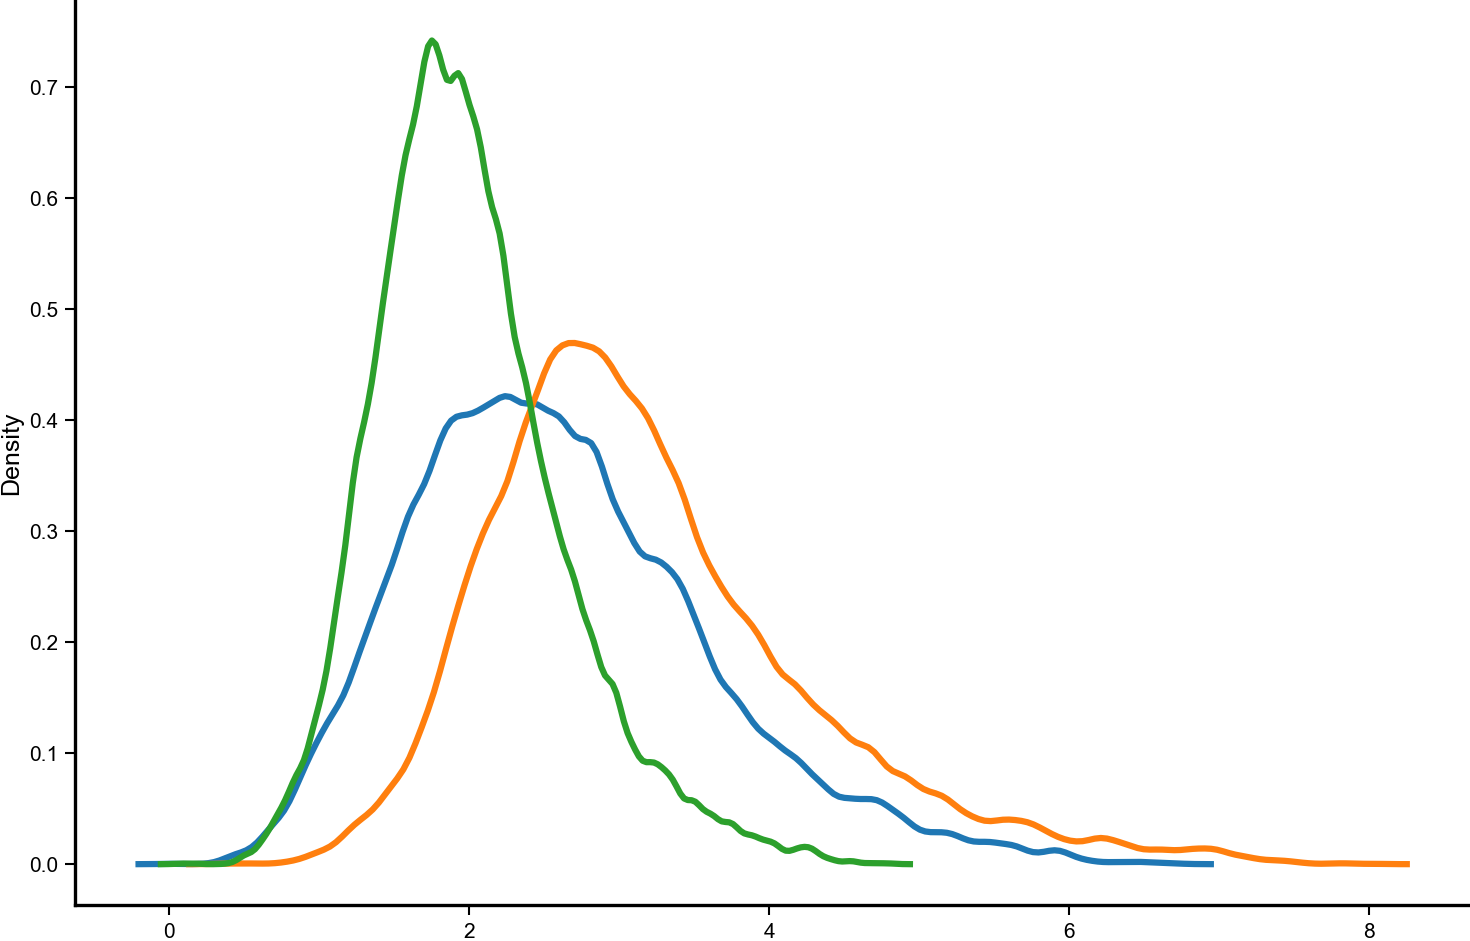

In [65]:
sm_erk = get_sm_subset('erk')
sns.kdeplot(sm_erk[idx], bw_adjust=.5)

sm_han = get_sm_subset('han')
sns.kdeplot(sm_han[idx], bw_adjust=.5)

sm_ant = get_sm_subset('liber-antiphons')
sns.kdeplot(sm_ant[idx], bw_adjust=.5)

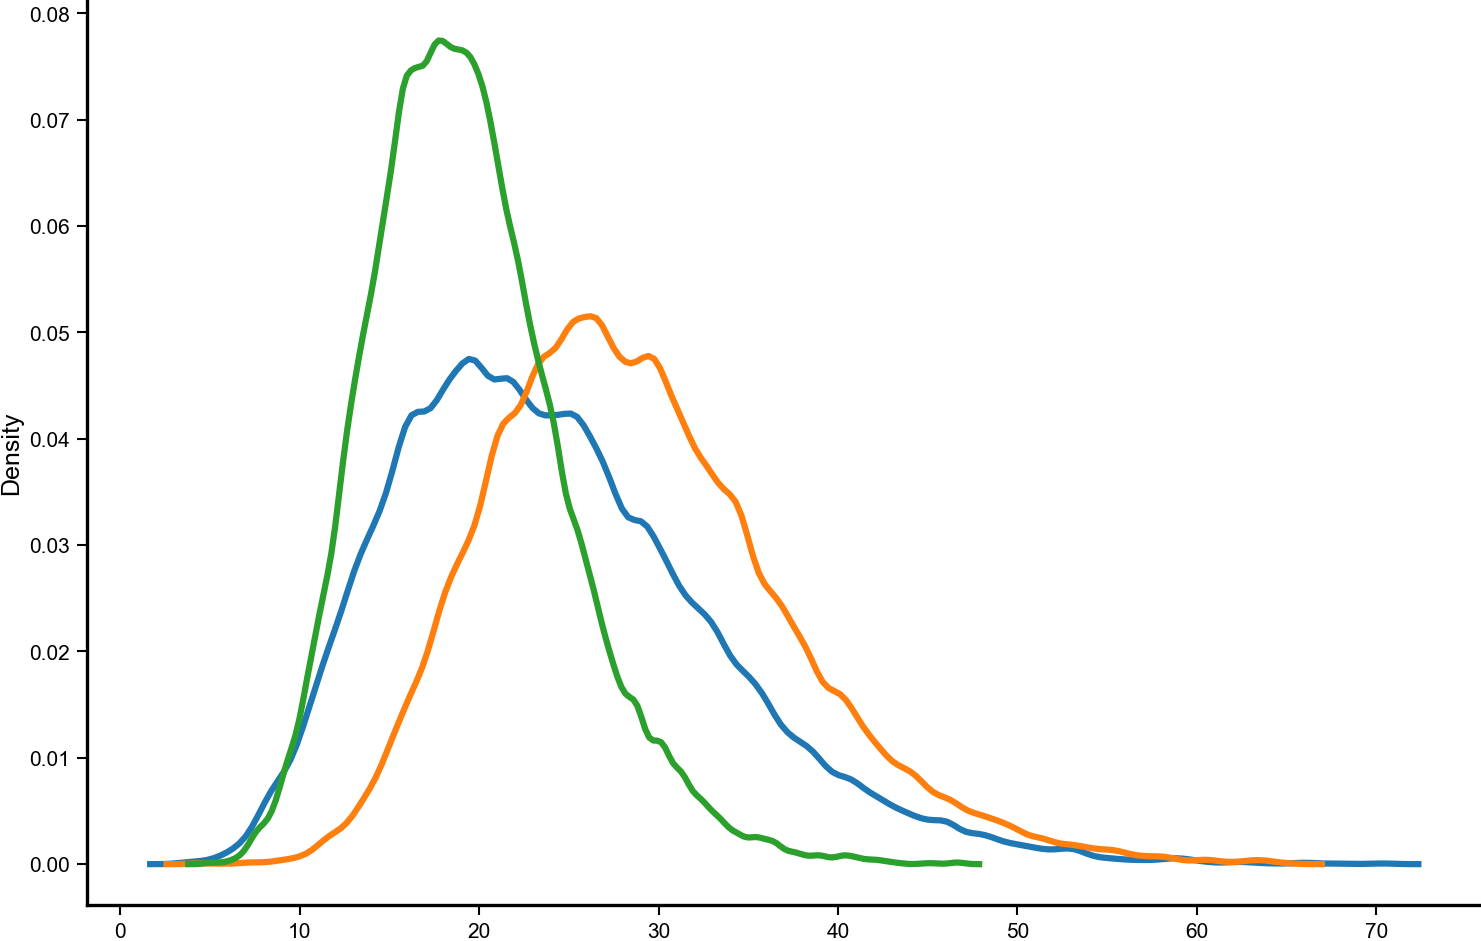

In [59]:
sm_erk = get_sm_subset('erk')
sns.kdeplot(sm_erk[idx], bw_adjust=.5)

sm_han = get_sm_subset('han')
sns.kdeplot(sm_han[idx], bw_adjust=.5)

sm_ant = get_sm_subset('liber-antiphons')
sns.kdeplot(sm_ant[idx], bw_adjust=.5)

In [60]:
diptest(np.msort(sm_ant[idx].ravel()), is_hist=False, numt=100)

(0.0013252107105387323, 1.0, (5434, 6531))

In [61]:
diptest(np.msort(sm_erk[idx].ravel()), is_hist=False, numt=100)

(0.0017419623492159753, 1.0, (4318, 5854))

## Preliminary analysis

In [67]:
X = np.loadtxt('../data/mds/metric-mds-dtw-200-centered.txt.gz')

In [78]:
datasets = ['erk', 'han', 'liber-antiphons']

In [79]:
pd.value_counts(meta['dataset_id'])

erk                   200
liber-responsories    200
boehme                200
creighton             200
liber-antiphons       200
natmin                200
shanxi                200
liber-alleluias       200
han                   200
Name: dataset_id, dtype: int64

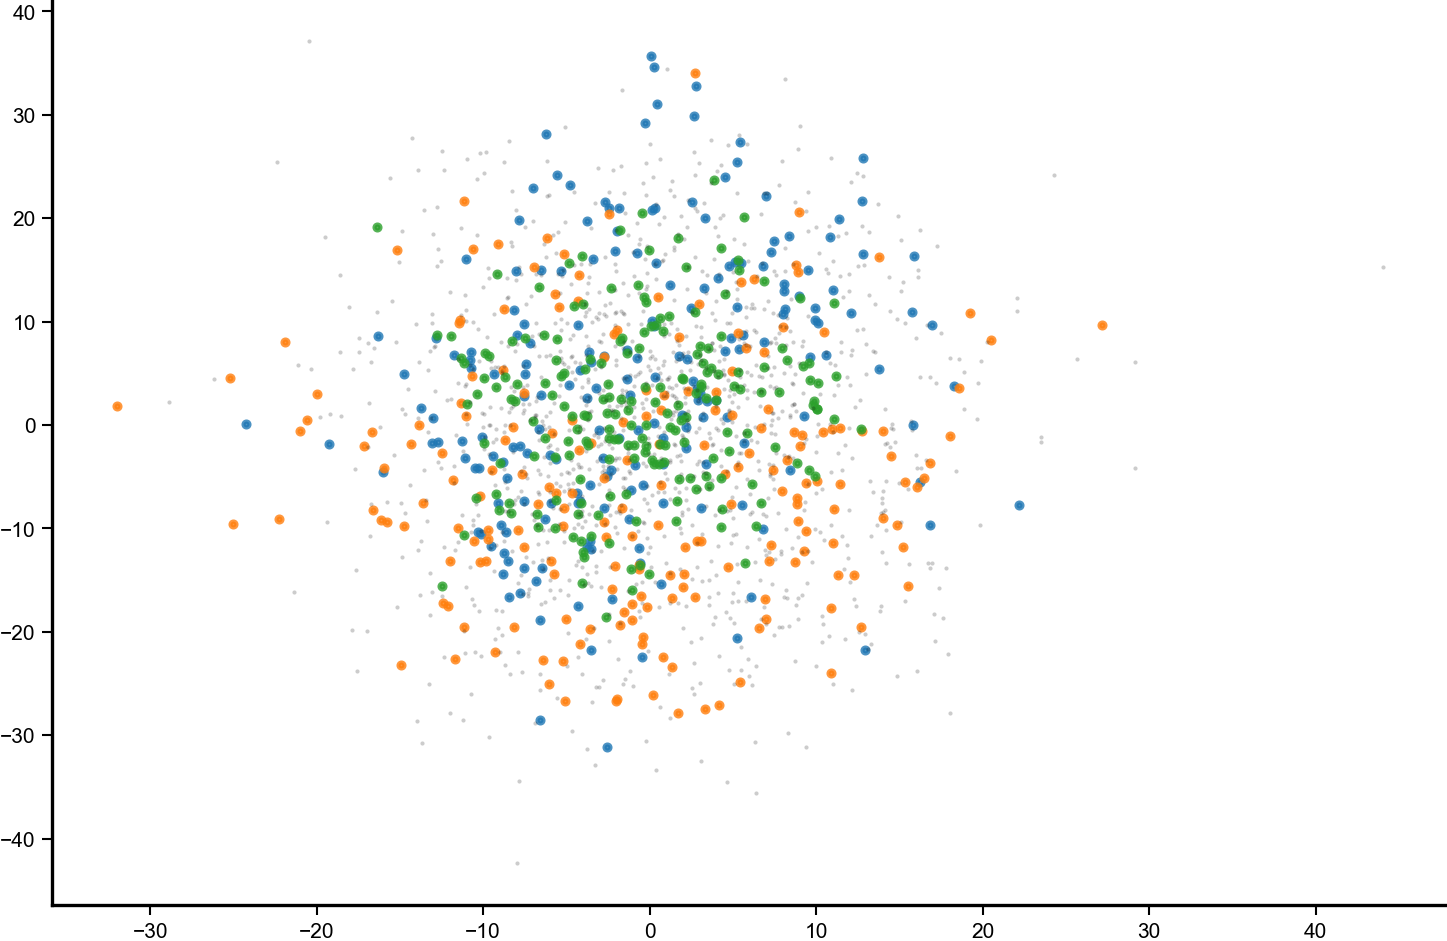

In [88]:
for dataset_id in datasets:
    matches = meta['dataset_id'] == dataset_id
    x, y = X[matches, :].T
    plt.scatter(x, y, s=2, alpha=.8)

matches = meta['dataset_id'].isin(datasets) == False
x, y = X[matches, :].T
plt.scatter(x, y, s=1, c='k', alpha=.2, lw=0)